In [1]:
#考虑一个神经网络，结构如下：

#一个输入节点 (x)
#一个隐藏层，包含两个神经元 (h_1, h_2)，均使用 ReLU 激活函数 ( \text{ReLU}(z) = \max(0, z) )
#一个输出节点 (y_{pred})，使用 Sigmoid 激活函数 ( \sigma(z) = \frac{1}{1 + e^{-z}} )

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#计算relu激活函数
def relu(a):
  return np.maximum(0, a)

In [9]:
#计算sigmoid函数
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [26]:
#前向传播，求输出y_pred的值
def forward(w1, w2, b1, b2, x):
  z= w1 * x + b1 #shape (2,)
  h= relu(z) #shape (2,)

  y_pred = sigmoid(np.dot(h, w2.T) + b2) #shape(2,)
  return y_pred, h, z

In [11]:
#求损失函数loss值
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [17]:
#反向传播，计算梯度
def backward(y_pred, y_true, h, z, w2, x):
  b2_grad = (y_pred - y_true) * y_pred * (1- y_pred)
  w2_grad = b2_grad * h #shape (2,)

  b1_grad = b2_grad.T * w2 * (z>0)
  w1_grad = b1_grad * x
  return w1_grad, w2_grad, b1_grad, b2_grad

In [16]:
#参数更新
def update_params(w1, w2, b1, b2, w1_grad, w2_grad, b1_grad, b2_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return w1, w2, b1, b2

epoch: 1 loss: 0.0571 y_pred: 0.56 w1_grad: [-0.08  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.04  0.  ] b2_grad: -0.08
epoch: 11 loss: 0.0515 y_pred: 0.58 w1_grad: [-0.08  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.04  0.  ] b2_grad: -0.08
epoch: 21 loss: 0.0463 y_pred: 0.6 w1_grad: [-0.08  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.04  0.  ] b2_grad: -0.07
epoch: 31 loss: 0.0415 y_pred: 0.61 w1_grad: [-0.08  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.04  0.  ] b2_grad: -0.07
epoch: 41 loss: 0.037 y_pred: 0.63 w1_grad: [-0.07  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.04  0.  ] b2_grad: -0.06
epoch: 51 loss: 0.033 y_pred: 0.64 w1_grad: [-0.07  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.03  0.  ] b2_grad: -0.06
epoch: 61 loss: 0.0293 y_pred: 0.66 w1_grad: [-0.07  0.  ] w2_grad: [-0.06 -0.  ] b1_grad: [-0.03  0.  ] b2_grad: -0.05
epoch: 71 loss: 0.026 y_pred: 0.67 w1_grad: [-0.06  0.  ] w2_grad: [-0.05 -0.  ] b1_grad: [-0.03  0.  ] b2_grad: -0.05
epoch: 81 loss: 0.023 y_pred: 0.69 w1_grad: [

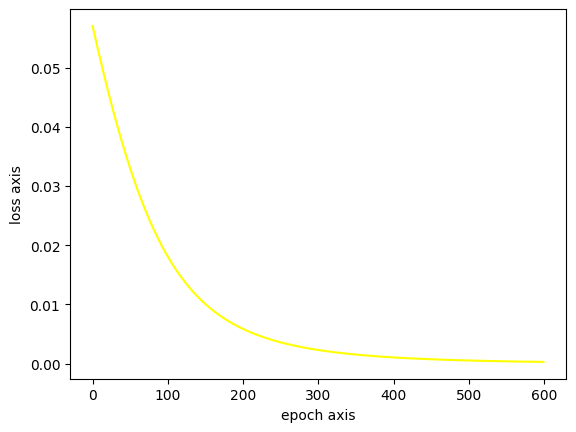

In [31]:
w1 = np.array([0.3, -0.2])

#隐藏层神经元的偏置:
b1 = np.array([0.1, 0.4])

#隐藏层到输出层的权重:
w2 = np.array([0.5, -0.4])

#输出层神经元的偏置:
b2 = -0.1

#训练样本:
x = 2.0
y_true = 0.9

learning_rate = 0.03
losses = []

epochs = 600

for epoch in range(epochs):
  y_pred, h, z = forward(w1, w2, b1, b2, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  w1_grad, w2_grad, b1_grad, b2_grad = backward(y_pred, y_true, h, z, w2, x)
  w1, w2, b1, b2 = update_params(w1, w2, b1, b2, w1_grad, w2_grad, b1_grad, b2_grad, learning_rate)

  if epoch % 10 ==0:
    print("epoch:", epoch + 1,
      "loss:", np.round(loss, 4),
      "y_pred:",np.round(y_pred, 2),
      "w1_grad:", np.round(w1_grad, 2),
      "w2_grad:", np.round(w2_grad, 2),
      "b1_grad:", np.round(b1_grad, 2),
      "b2_grad:", np.round(b2_grad, 2)
      )

plt.plot(range(epochs), losses, "yellow")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()

In [21]:
import torch
import matplotlib.pyplot as plt

In [32]:
#前向传播,求输出y_pred的值
def forward(w1, w2, b1, b2, x):
  z= w1 * x + b1 #shape (2,)
  h= torch.relu(z) #shape (2,)

  zout = torch.matmul(h, w2.t()) + b2 #shape(2,)
  y_pred = torch.sigmoid(zout)
  return y_pred, h, z

In [24]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true) **2 / 2
  return loss

epoch: 1 loss: 0.0571 y_pred: 0.5622 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 11 loss: 0.0515 y_pred: 0.5790 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 21 loss: 0.0463 y_pred: 0.5956 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 31 loss: 0.0415 y_pred: 0.6119 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 41 loss: 0.0370 y_pred: 0.6279 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 51 loss: 0.0330 y_pred: 0.6433 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 61 loss: 0.0293 y_pred: 0.6580 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 71 loss: 0.0260 y_pred: 0.6721 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 81 loss: 0.0230 y_pred: 0.6855 w1_grad: [-0.  0.] w2_grad: [-0. -0.] b1_grad: [-0.  0.] b2_grad: -0.0
epoch: 91 loss: 0.02

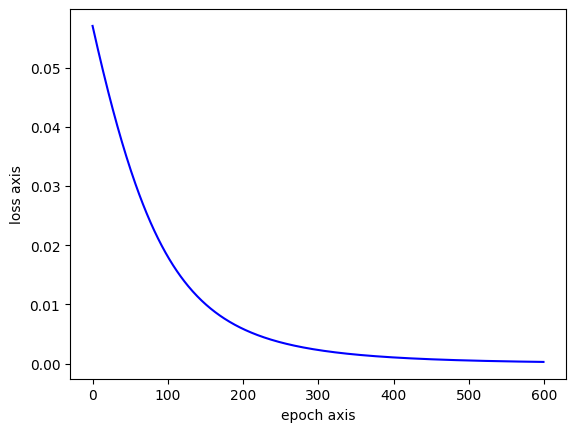

In [42]:
#初始化参数
w1 = torch.tensor([0.3, -0.2], requires_grad=True)

#隐藏层神经元的偏置:
b1 = torch.tensor([0.1, 0.4], requires_grad=True)

#隐藏层到输出层的权重:
w2 = torch.tensor([0.5, -0.4], requires_grad=True)

#输出层神经元的偏置:
b2 = torch.tensor([-0.1], requires_grad=True)

#训练样本:
x = 2.0
y_true = 0.9

learning_rate = 0.03
losses = []

epochs = 600

for epoch in range(epochs):
  y_pred, h, z = forward(w1, w2, b1, b2, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()

  #反向传导
  loss.backward()

  #更新参数params
  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad

  if epoch %10 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():0.4f}",
          f"y_pred: {y_pred.item():0.4f}",
          f"w1_grad: {w1_grad.round(2)}",
          f"w2_grad: {w2_grad.round(2)}",
          f"b1_grad: {b1_grad.round(2)}",
          f"b2_grad: {b2_grad.round(2)}"
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()